In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [39]:
IMAGE_SIZE = [224, 224]

In [40]:
#Give dataset path
train_path = '../data/train/'
test_path = '../data/test/'
validation_path = "../data/val/"

### Importing the VGG16 Model

In [41]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [42]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [43]:
for layer in vgg.layers:
  layer.trainable = False

In [52]:
topModel = vgg.output
topModel = Flatten(name="flatten")(topModel)
topModel = Dense(4096,activation="relu")(topModel)
topModel = Dense(1072,activation="relu")(topModel)
outputLayer = Dense(2,activation="softmax")(topModel)


model = Model(inputs=vgg.input, outputs=outputLayer)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [53]:

optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

### Importing the training,testing and validation data

In [46]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [47]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [153]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2329 images belonging to 2 classes.


In [6]:
class_names = ['Accident', 'Non accident']

In [154]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 423 images belonging to 2 classes.


In [155]:
validation_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 98 images belonging to 2 classes.


### Training the model

In [156]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', monitor="val_accuracy",
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=validation_set,
  epochs=20,
  callbacks=callbacks)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
73/73 [==============================] - 588s 7s/step - loss: 0.5077 - accuracy: 0.7776 - val_loss: 0.4531 - val_accuracy: 0.8265

Epoch 00001: val_accuracy improved from -inf to 0.82653, saving model to mymodel.h5
Epoch 2/20
73/73 [==============================] - 448s 6s/step - loss: 0.4052 - accuracy: 0.8059 - val_loss: 0.4549 - val_accuracy: 0.8367

Epoch 00002: val_accuracy improved from 0.82653 to 0.83673, saving model to mymodel.h5
Epoch 3/20
73/73 [==============================] - 465s 6s/step - loss: 0.3280 - accuracy: 0.8519 - val_loss: 0.4818 - val_accuracy: 0.7653

Epoch 00003: val_accuracy did not improve from 0.83673
Epoch 4/20
73/73 [==============================] - 471s 6s/step - loss: 0.3359 - accuracy: 0.8570 - val_loss: 0.5322 - val_accuracy: 0.7653

Epoch 00004: val_accuracy did not improve from 0.83673
Epoch 5/20
73/73 [==============================] - 472s 6s/step - loss: 0.3369 - accuracy: 0.8497 - val_loss: 0.4916 - val_accuracy: 0.8061

Epoch 000

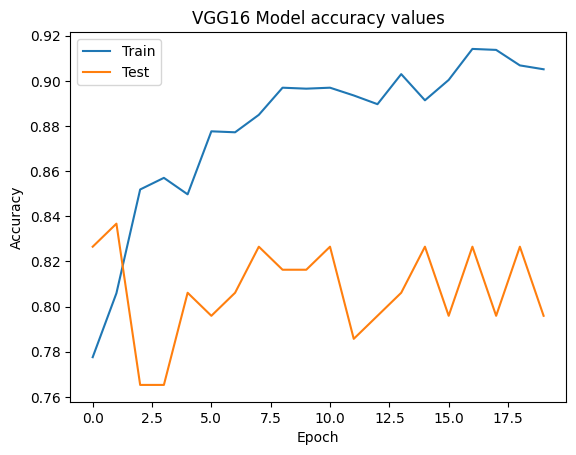

In [157]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('VGG16 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [4]:
loaded_model = tf.keras.models.load_model("mymodel.h5")
loaded_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Testing the model

In [12]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/test',
    seed=42,
    image_size= (224,224),
    batch_size=100,
    color_mode='rgb'
)
predlabel = []
actual = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    actual = labels
    predictions = loaded_model.predict(images)

    
    for mem in predictions:
        predlabel.append(np.argmax(mem))

    
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ class_names[predlabel[i]]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
    
    print(predlabel)

Found 423 files belonging to 2 classes.
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0]


### Evaluating the model

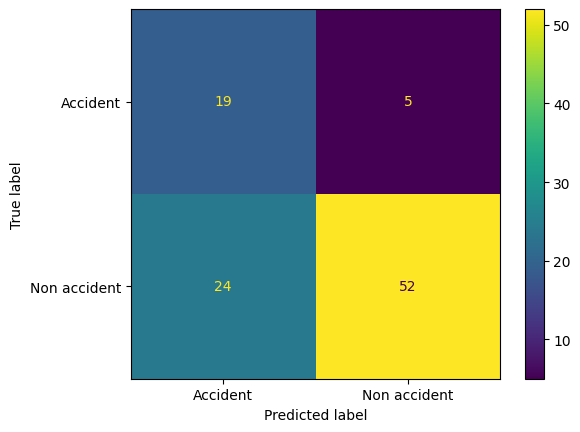

In [14]:
cm = confusion_matrix(labels, predlabel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=class_names)
disp.plot()

### Detecting accident from image

In [13]:
from keras.preprocessing import image
from PIL import Image
import cv2

def predict_accident(filename):
    img_width, img_height = 224, 224
    img = image.load_img((filename), target_size = (img_width, img_height, 3))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction)
    #if(predicted_class==1):
        #print("No accident")
    if(predicted_class==0):
        if(prediction[0][predicted_class]>0.8):  
            dis = plt.imread(filename)
            plt.axis("off") 
            plt.imshow(dis)
            print("Accident")
            print("\n Predicted with accuracy " + str(prediction[0][predicted_class])+" \n")
            return 1
    return 0
    

In [30]:
predict_accident('../data/test.jpg')

0

### Alerting the emergency services

In [16]:
from twilio.rest import Client
import keys

def callEmergencyServices():
       client = Client(keys.acount_sid,keys.auth_token)

       call = client.calls.create(
            url='http://demo.twilio.com/docs/voice.xml',
            to="+919480763957",
            from_= keys.twilio_number
       )
     

### Detecting accident from video

In [14]:
import cv2;

def frameCapture(path):
    video = cv2.VideoCapture(path)
    success=1
    count = 0
    while(success):
        count+=1
        success, image = video.read()
        cv2.imwrite("../data/frames/acc_4_"+str(count)+".jpg",image)
        ret = predict_accident("../data/frames/acc_4_"+str(count)+".jpg")
        if(ret==1):
          callEmergencyServices()
          break

In [17]:
frameCapture("../data/acc_vid_1.mp4")

Accident

 Predicted with accuracy 0.8169397 

CA1f1b7e5880361278295d3e6b2e14ddd5
